In [6]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import folium

In [7]:
### Data Evaluation ###

# Creating a common file for the radiation data using CSV
filename_data = "rad_data.csv"
file_data = open(filename_data,"w",newline="")
writer_data = csv.writer(file_data)
meta_data = ["Index","Mean","Std"]
writer_data.writerow(meta_data)

# Iteratively reading the radiation measurements using Pandas and writing them to a common file using CSV
for i in range(1,34):
    filename_temp = f"data/loc{i}.csv"
    data_temp = pd.read_csv(filename_temp)
    mean_temp = np.mean(data_temp["counts"])/2
    std_temp = np.std(data_temp["counts"])/2
    data_out = [i,mean_temp,std_temp]
    writer_data.writerow(data_out)

file_data.close()

# Combining the location and radiation data into one file using Pandas
locations = pd.read_csv("locations.csv")
rad_data = pd.read_csv("rad_data.csv")
data = locations.merge(rad_data)
data.to_csv("data.csv", index=False)

In [8]:
### Map ###
map = folium.Map(location=[37.872106,-122.259042], zoom_start=15.5)
for i in range(1,34):
    
    mean_i = data.loc[i-1,"Mean"]
    if mean_i <= 15:
        pcolor = 'lightgreen'
    elif mean_i <= 18:
        pcolor = 'green'
    elif mean_i <= 21:
        pcolor = 'orange'
    elif mean_i <= 24:
        pcolor = 'red'
    elif mean_i <= 27:
        pcolor = 'darkred'
    elif mean_i > 27:
        pcolor = 'darkpurple'
    else:
        pcolor = 'black'
    
    ptext=f'<span style="white-space: nowrap;"><strong>Location {i}</strong><br>Mean: {round(data.loc[i-1,"Mean"],3)}<br>Std.: {round(data.loc[i-1,"Std"],3)}</span>' # span prevents line breaking
    
    folium.Marker([data.loc[i-1,"Latitude"],data.loc[i-1,"Longitude"]],
                popup=ptext,
                tooltip=round(data.loc[i-1,"Mean"],3),
                icon=folium.Icon(color=pcolor, icon='none')).add_to(map) # radiation symbol: icon='fa-radiation', prefix='fa'



### Legend ###
# adapted from https://gist.github.com/ColinTalbert/18f8901fc98f109f2b71156cf3ac81cd#file-foliumlegend-ipynb 
from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 15px; top: 15px;'>
     
<div class='legend-title'>Radiation [Bq]</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:lightgreen;opacity:0.7;'></span><= 15</li>
    <li><span style='background:green;opacity:0.7;'></span>15-18</li>
    <li><span style='background:orange;opacity:0.7;'></span>18-21</li>
    <li><span style='background:red;opacity:0.7;'></span>21-24</li>
    <li><span style='background:darkred;opacity:0.7;'></span>24-27</li>
    <li><span style='background:purple;opacity:0.7;'></span>>27</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

map.get_root().add_child(macro)



### Show Map ###
map

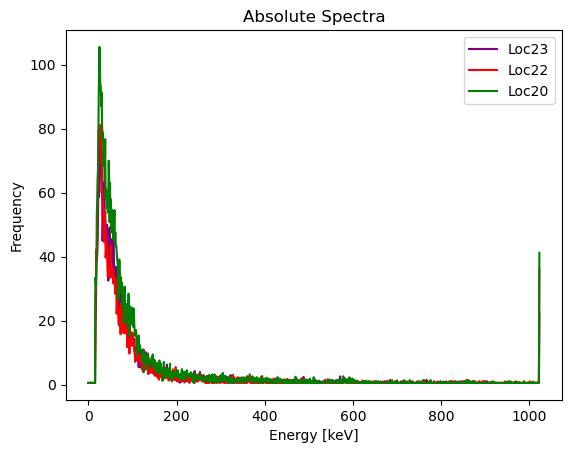

In [9]:
### Spectrum Comparison
# Absolute Comparison
spectrum = pd.read_csv('spectrum.csv')
plt.plot(spectrum["Loc23"], label = 'Loc23', color = 'purple')
plt.plot(spectrum["Loc22"], label = 'Loc22', color = 'red')
plt.plot(spectrum["Loc20"], label = 'Loc20', color = 'green')
plt.title('Absolute Spectra')
plt.xlabel('Energy [keV]')
plt.ylabel('Frequency')
plt.legend()

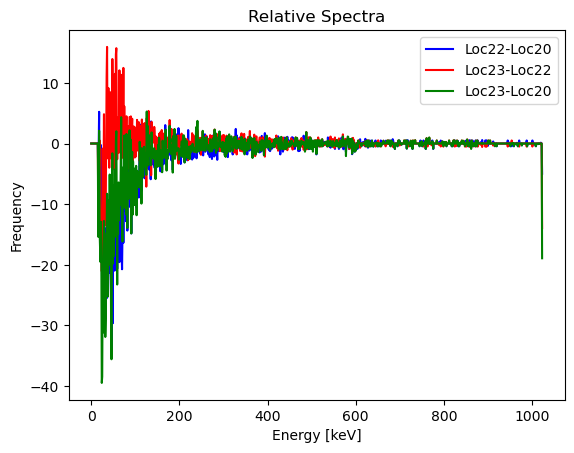

In [10]:
# Relative Comparison
spectrum = pd.read_csv('spectrum.csv')
plt.plot(spectrum["Loc22"]-spectrum["Loc20"], label = 'Loc22-Loc20', color = 'blue')
plt.plot(spectrum["Loc23"]-spectrum["Loc22"], label = 'Loc23-Loc22', color = 'red')
plt.plot(spectrum["Loc23"]-spectrum["Loc20"], label = 'Loc23-Loc20', color = 'green')
plt.title('Relative Spectra')
plt.xlabel('Energy [keV]')
plt.ylabel('Frequency')
plt.legend()